In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


In [5]:
texto = ''' 
ASDA SADFSFD dfgsdf
DSFGS asdf
SDFSF aewqd
SD TRH SFGSDF dsfg
fgsdfg DFGSD
'''

string='ASDF SAD SDF sdf'

pattern = re.compile(r'^[A-Z]+([ ][A-Z]*)*')
matches = pattern.finditer(string)

for match in matches:
  print(match)

<re.Match object; span=(0, 13), match='ASDF SAD SDF '>


# **ANALISIS ARCHIVO ATHLETES**




In [6]:
athletes = pd.read_excel('/content/Athletes.xlsx')

athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [7]:
#No posee nulos
athletes.isna().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [8]:
athletes.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,CHEN Yang,United States of America,Athletics
freq,2,615,2068


In [9]:
print('Cantidad de atletas:', athletes.shape[0])

Cantidad de atletas: 11085


In [10]:
print('Cantidad de disciplinas:', len(athletes.Discipline.unique()))

Cantidad de disciplinas: 46


In [11]:
print('Cantidad de paises participantes:', len(athletes.NOC.unique()))

Cantidad de paises participantes: 206


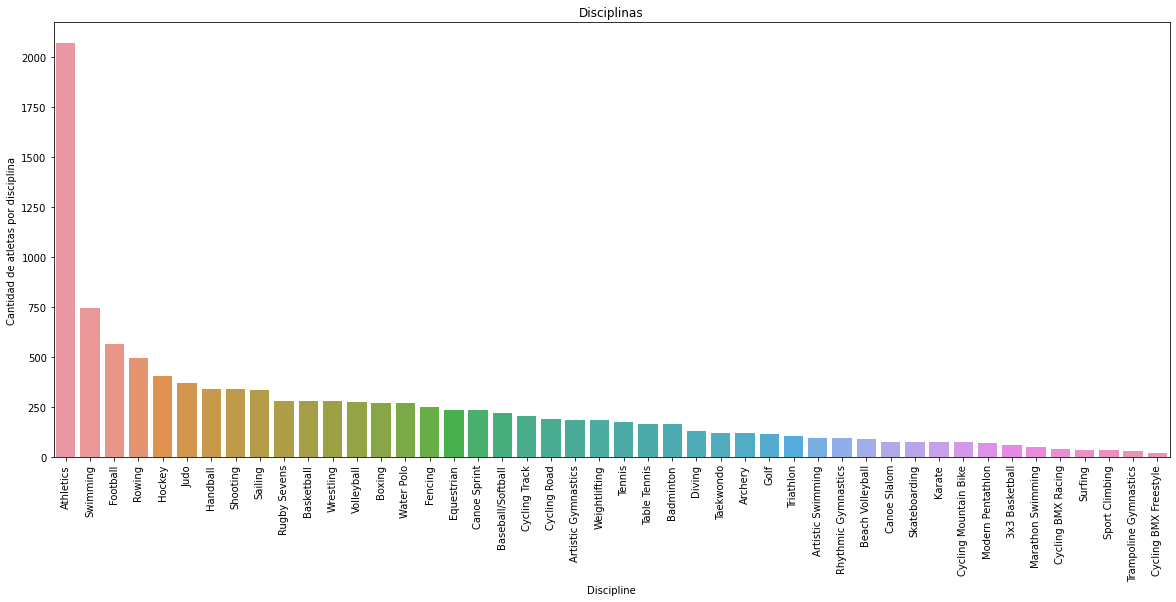

In [12]:
plt.figure(figsize=(20,8))
order = athletes.value_counts('Discipline')
sns.countplot(x='Discipline', data=athletes, order=order.index)

plt.ylabel('Cantidad de atletas por disciplina')
plt.title('Disciplinas')
plt.xticks(rotation=90)
plt.show()

In [13]:
athletes[athletes.duplicated('Name', keep=False)].head(10)

,Name,NOC,Discipline
253,ALI Mohamed,Bahrain,Handball
254,ALI Mohamed,Bahrain,Handball
319,ALVAREZ Jorge,Cuba,Shooting
320,ALVAREZ Jorge,Honduras,Football
1703,CHEN Yang,People's Republic of China,Athletics
1704,CHEN Yang,People's Republic of China,Hockey
2551,DYGERT Chloe,United States of America,Cycling Road
2552,DYGERT Chloe,United States of America,Cycling Track
3128,GANNA Filippo,Italy,Cycling Road
3129,GANNA Filippo,Italy,Cycling Track


# **ANALISIS ARCHIVO ENTRIESGENDER**

In [14]:
entriesGender = pd.read_excel('/content/EntriesGender.xlsx')

entriesGender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [15]:
#Disciplinas por genero no posee nulos
entriesGender.isna().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [16]:
entriesGender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


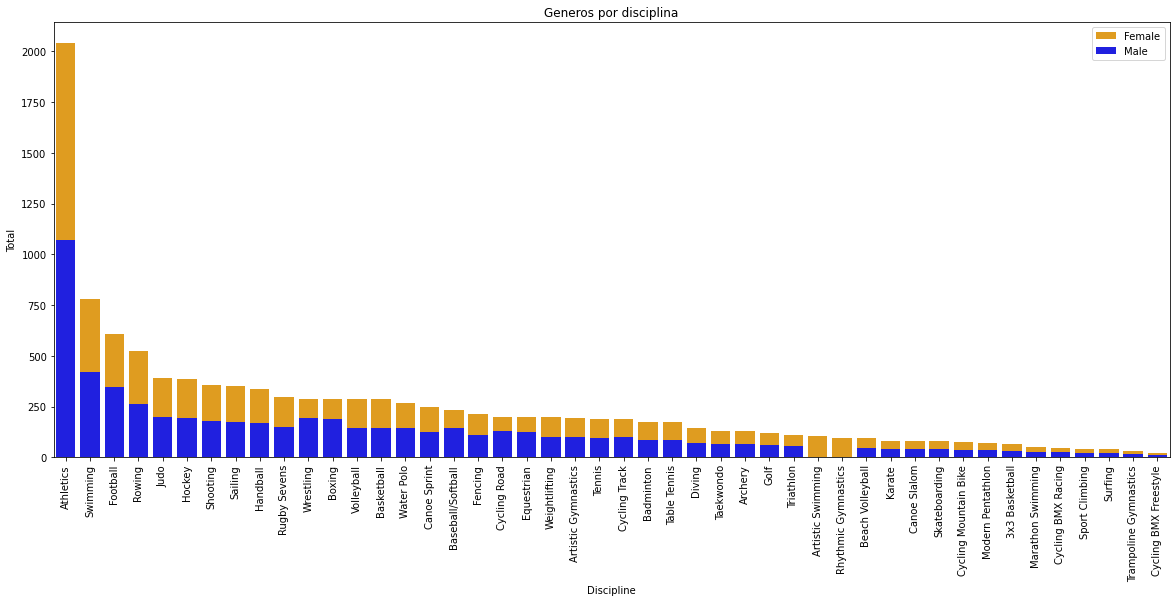

In [17]:
#grafico de barras de generos por disciplinas

plt.figure(figsize=(20,8))

order = entriesGender.sort_values('Total', ascending=False)
sns.barplot(entriesGender['Discipline'], entriesGender['Female'], bottom=order.Male, color='orange', order=order.Discipline, label='Female')
sns.barplot(entriesGender['Discipline'], entriesGender['Male'], color='blue', order=order.Discipline, label='Male')
plt.xticks(rotation=90)
plt.title('Generos por disciplina')
plt.ylabel('Total')
plt.legend()

plt.show()

In [18]:
#Chequear que el total coincida

count = len(entriesGender[entriesGender['Total']!=entriesGender['Female']+entriesGender['Male']])

print('Hay un total de',count,'lineas con datos totales incorrectos')

Hay un total de 0 lineas con datos totales incorrectos


# **ANALISIS ARCHIVO MEDALS**

In [19]:
medals = pd.read_excel('/content/Medals.xlsx')

medals.head(5)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,7,3,4,14,2
1,2,Japan,7,1,3,11,3
2,3,People's Republic of China,6,3,6,15,1
3,4,Great Britain,3,2,1,6,7
4,5,Republic of Korea,3,0,4,7,6


In [20]:
#Medals no posee nulos
medals.isna().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [21]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,22.937500,0.916667,0.916667,1.229167,3.062500,18.541667
std,12.932569,1.698978,1.126722,1.372055,3.379577,9.642456
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,12.000000,0.000000,0.000000,0.000000,1.000000,12.000000
50%,24.500000,0.000000,1.000000,1.000000,2.000000,15.000000
75%,36.250000,1.000000,1.000000,2.000000,3.000000,29.000000
max,41.000000,7.000000,5.000000,6.000000,15.000000,29.000000


In [22]:
#revisar que no haya paises mal escritos
sorted(medals['Team/NOC'].unique())

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chinese Taipei',
 'Colombia',
 'Croatia',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Ecuador',
 'Egypt',
 'Estonia',
 'France',
 'Georgia',
 'Germany',
 'Great Britain',
 'Hungary',
 'India',
 'Indonesia',
 'Islamic Republic of Iran',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kosovo',
 'Kuwait',
 'Mexico',
 'Mongolia',
 'Netherlands',
 'New Zealand',
 'Norway',
 "People's Republic of China",
 'ROC',
 'Republic of Korea',
 'Romania',
 'Serbia',
 'Slovenia',
 'Spain',
 'Switzerland',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United States of America',
 'Uzbekistan']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


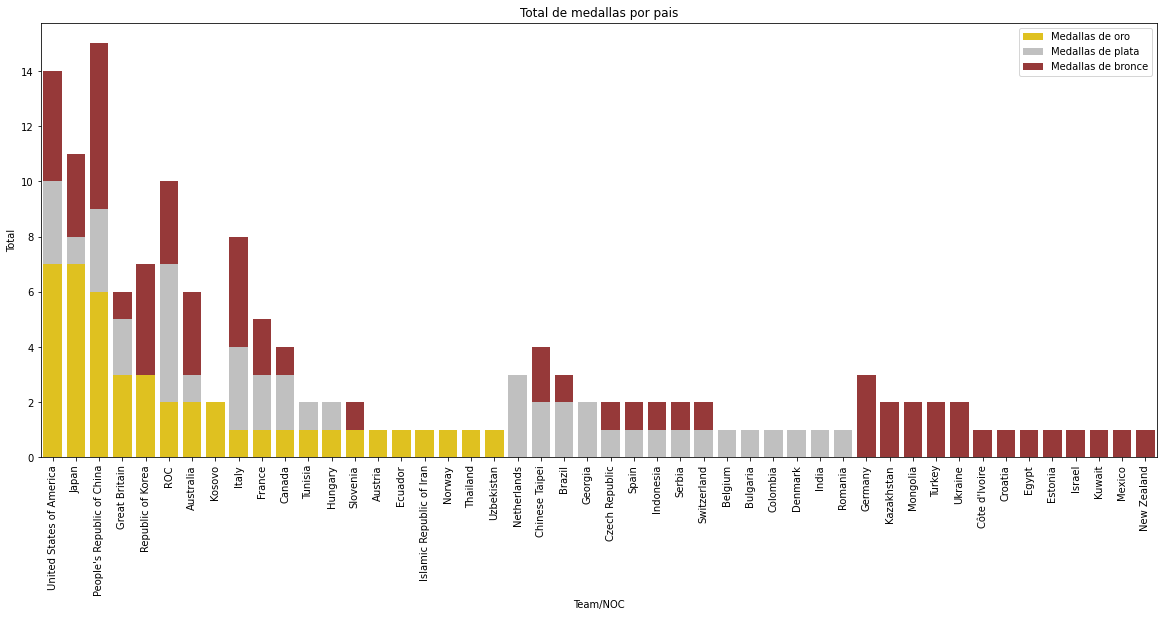

In [23]:
#grafico de barras de paises con mas medallas

plt.figure(figsize=(20,8))

order = medals.sort_values('Rank')
sns.barplot(medals['Team/NOC'], medals['Gold'], order=order['Team/NOC'], color='gold', label='Medallas de oro')
sns.barplot(medals['Team/NOC'], medals['Silver'], bottom=order['Gold'], order=order['Team/NOC'], color='silver', label='Medallas de plata')
sns.barplot(medals['Team/NOC'], medals['Bronze'], bottom=order['Gold']+order['Silver'], order=order['Team/NOC'], color='brown', label='Medallas de bronce')

plt.xticks(rotation=90)
plt.title('Total de medallas por pais')
plt.ylabel('Total')
plt.legend()

plt.show()

# **ANALISIS ARCHIVO COACHES**

In [82]:
coaches = pd.read_excel('/content/Coaches.xlsx')

coaches.head(10)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
6,AL SAADI Kais,Germany,Hockey,Men
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
9,ALEKSEEV Alexey,ROC,Handball,Women


In [25]:
#Coaches posee nulos en la columna event
coaches.isna().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

In [26]:
coaches.describe()

,Name,NOC,Discipline,Event
count,394,394,394,249
unique,381,61,9,6
top,REQUENA PERICAS Judit,Japan,Basketball,Men
freq,2,35,74,94


In [27]:
#Duet = Team & Softball - Baseball
coaches['Event'].value_counts()

Men         94
Women       88
Duet        27
Softball    20
Team        14
Baseball     6
Name: Event, dtype: int64

In [28]:
#Revisar eventos Softball y Baseball
coaches[coaches['Event']=='Baseball'].append(coaches[coaches['Event']=='Softball'].head())

,Name,NOC,Discipline,Event
61,CHOI Il Eon,Republic of Korea,Baseball/Softball,Baseball
108,FISH Nathan,Israel,Baseball/Softball,Baseball
120,GARCIA HERRERA Manuel,Dominican Republic,Baseball/Softball,Baseball
185,KANEKO Makoto,Japan,Baseball/Softball,Baseball
267,MUNOZ Noe de Jesus,Mexico,Baseball/Softball,Baseball
378,WEINSTEIN Jerry,United States of America,Baseball/Softball,Baseball
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
25,BASILIO Mel,Canada,Baseball/Softball,Softball
31,BERG Laura,United States of America,Baseball/Softball,Softball
52,CARO Carlos,Mexico,Baseball/Softball,Softball


In [29]:
#Confirmar que los eventos Team y Duet pertenecen a la misma disciplina
coaches[coaches['Event']=='Team'].head().append(coaches[coaches['Event']=='Duet'].head())

,Name,NOC,Discipline,Event
57,CHEPAK Anastasiya,Egypt,Artistic Swimming,Team
59,CHERNETSKA Natalia,Greece,Artistic Swimming,Team
93,ELAFANDI Nour,Egypt,Artistic Swimming,Team
103,FARINELLI Roberta,Italy,Artistic Swimming,Team
116,FUJIKI Mayuko,Spain,Artistic Swimming,Team
26,BASSO Paola,Great Britain,Artistic Swimming,Duet
35,BLECHER SIDOROVA Svetlana,Israel,Artistic Swimming,Duet
56,CHEPAK Anastasiya,Egypt,Artistic Swimming,Duet
58,CHERNETSKA Natalia,Greece,Artistic Swimming,Duet
71,DANCHENKO Tatiana,ROC,Artistic Swimming,Duet


# **ANALISIS ARCHIVO TEAMS**

In [30]:
teams = pd.read_excel('/content/Teams.xlsx')

teams.head(5)

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [31]:
#Teams no posee nulos
teams.isna().sum()

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

In [32]:
teams.describe()

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


In [33]:
teams['Discipline'].value_counts()

Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Artistic Gymnastics     24
Volleyball              24
Basketball              24
Handball                24
Hockey                  24
Rugby Sevens            24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: Discipline, dtype: int64

In [34]:
teams['Event'].value_counts()

Men                                 120
Women                               114
Men's Team                           40
Women's Team                         40
Mixed Team                           29
Duet                                 22
Mixed Relay                          18
Women's 4 x 200m Freestyle Relay     17
Women's 4 x 400m Relay               16
Women's 4 x 100m Medley Relay        16
Men's 4 x 200m Freestyle Relay       16
Mixed 4 x 100m Medley Relay          16
Men's 4 x 100m Medley Relay          16
Women's 4 x 100m Freestyle Relay     16
Women's Madison                      16
Men's Madison                        16
Mixed Doubles                        16
Women's 4 x 100m Relay               16
Men's 4 x 100m Relay                 16
Men's 4 x 400m Relay                 16
Men's 4 x 100m Freestyle Relay       16
4 x 400m Relay Mixed                 15
Group All-Around                     14
Team                                 10
Men's Foil Team                       9


In [35]:
#Revisar los paises que tienen diferentes nombre de equipo
teams[teams['Name']!=teams['NOC']]['NOC'].unique()

array(["People's Republic of China", 'United States of America',
       'Republic of Moldova', 'Republic of Korea', 'Dominican Republic',
       'Trinidad and Tobago', 'Islamic Republic of Iran', 'Argentina',
       'Australia', 'Brazil', 'Canada', 'Chile', 'Cuba', 'Czech Republic',
       'Germany', 'Italy', 'Japan', 'Kenya', 'Latvia', 'Mexico',
       'Morocco', 'Netherlands', 'Norway', 'Poland', 'Qatar', 'ROC',
       'Spain', 'Switzerland', "Côte d'Ivoire", 'Austria',
       'Chinese Taipei', 'Egypt', 'France', 'Hong Kong, China', 'Hungary',
       'India', 'Romania', 'Slovakia'], dtype=object)

In [36]:
#Revisar los nombres de equipo que tienen diferentes NOC
teams[teams['Name']!=teams['NOC']]['Name'].unique()

array(['China', 'United States', 'Rep. of Moldova', 'Korea',
       'Dominican Rep.', 'Trinidad & Tobago', 'Islamic Rep. of Iran',
       'Azaad/Capogrosso', 'Gallay/Pereyra', 'McHugh/Schumann',
       'Artacho Del Solar/Clancy', 'Alison/Alvaro Filho',
       'Evandro/Bruno Schmidt', 'Ana Patricia/Rebecca', 'Agatha/Duda',
       'Bansley/Brandie', 'Pavan/Melissa', 'Grimalt M./Grimalt E.',
       'Wang/X.Y.Xia', 'Xue/Wang X.X.', 'Lidy/Leila', 'Perusic/Schweiner',
       'Hermannova/Slukova', 'Thole J./Wickler', 'Ludwig/Kozuch',
       'Sude/Borger', 'Nicolai/Lupo', 'Carambula/Rossi',
       'Menegatti/Orsi Toth', 'Gottsu/Shiratori', 'Ishii/Murakami',
       'Makokha/Khadambi', 'Plavins/Tocs', 'Graudina/Kravcenoka',
       'Gaxiola/Rubio', 'Abicha/Elgraoui', 'Brouwer/Meeuwsen',
       'Keizer/Meppelink', 'Stam/Schoon', 'Mol A./Sorum C.',
       'Bryl/Fijalek', 'Kantor/Losiak', 'Cherif/Ahmed',
       'Krasilnikov/Stoyanovskiy', 'Leshukov/Semenov',
       'Makroguzova/Kholomina', 'Herrera/

In [37]:
#chequear y entender porque varian el nombre y el NOC
teams[teams['Name']=='Rep. of Moldova'].append(teams[teams['Name']=='Gallay/Pereyra']).append(teams[teams['Name']=='Côte d’Ivoire'])

,Name,Discipline,NOC,Event
54,Rep. of Moldova,Archery,Republic of Moldova,Mixed Team
241,Gallay/Pereyra,Beach Volleyball,Argentina,Women
412,Côte d’Ivoire,Football,Côte d'Ivoire,Men


In [38]:
teams[teams['Event']=='Mixed Team'].head(10)

,Name,Discipline,NOC,Event
17,Australia,Archery,Australia,Mixed Team
18,Bangladesh,Archery,Bangladesh,Mixed Team
20,Brazil,Archery,Brazil,Mixed Team
21,Canada,Archery,Canada,Mixed Team
23,China,Archery,People's Republic of China,Mixed Team
26,Chinese Taipei,Archery,Chinese Taipei,Mixed Team
28,Colombia,Archery,Colombia,Mixed Team
29,Egypt,Archery,Egypt,Mixed Team
31,France,Archery,France,Mixed Team
32,Germany,Archery,Germany,Mixed Team


In [39]:
#confirmacion de que los eventos Duel y Team ambos pertenecen a Artistic Swimming
teams[teams['Event']=='Duet'].head().append(teams[teams['Event']=='Team'].head())

,Name,Discipline,NOC,Event
93,Australia,Artistic Swimming,Australia,Duet
95,Austria,Artistic Swimming,Austria,Duet
96,Belarus,Artistic Swimming,Belarus,Duet
97,Canada,Artistic Swimming,Canada,Duet
99,China,Artistic Swimming,People's Republic of China,Duet
94,Australia,Artistic Swimming,Australia,Team
98,Canada,Artistic Swimming,Canada,Team
100,China,Artistic Swimming,People's Republic of China,Team
103,Egypt,Artistic Swimming,Egypt,Team
107,Greece,Artistic Swimming,Greece,Team


In [40]:
teams[~teams['Name'].str.contains(r'/')].Name.unique()

array(['Belgium', 'China', 'France', 'Italy', 'Japan', 'Latvia',
       'Mongolia', 'Netherlands', 'Poland', 'ROC', 'Romania', 'Serbia',
       'United States', 'Australia', 'Bangladesh', 'Belarus', 'Brazil',
       'Canada', 'Chinese Taipei', 'Colombia', 'Egypt', 'Germany',
       'Great Britain', 'India', 'Indonesia', 'Kazakhstan', 'Malaysia',
       'Mexico', 'Rep. of Moldova', 'Republic of Korea', 'Spain',
       'Tunisia', 'Turkey', 'Ukraine', 'Vietnam', 'Korea', 'Switzerland',
       'Austria', 'Greece', 'Israel', 'Liechtenstein', 'South Africa',
       'Bahamas', 'Botswana', 'Cuba', 'Czech Republic', 'Denmark',
       'Dominican Rep.', 'Ecuador', 'Ghana', 'Ireland', 'Jamaica',
       'Nigeria', 'Trinidad & Tobago', 'Argentina',
       'Islamic Rep. of Iran', 'Puerto Rico', 'Slovenia',
       'Hong Kong, China', 'Lithuania', 'New Zealand', 'Estonia',
       'Hungary', 'Chile', 'Côte d’Ivoire', 'Honduras', 'Saudi Arabia',
       'Sweden', 'Zambia', 'Angola', 'Bahrain', 'Montenegro

In [41]:
teams[teams['Name'].str.contains(r'/')].Name.unique()

array(['Azaad/Capogrosso', 'Gallay/Pereyra', 'McHugh/Schumann',
       'Artacho Del Solar/Clancy', 'Alison/Alvaro Filho',
       'Evandro/Bruno Schmidt', 'Ana Patricia/Rebecca', 'Agatha/Duda',
       'Bansley/Brandie', 'Pavan/Melissa', 'Grimalt M./Grimalt E.',
       'Wang/X.Y.Xia', 'Xue/Wang X.X.', 'Lidy/Leila', 'Perusic/Schweiner',
       'Hermannova/Slukova', 'Thole J./Wickler', 'Ludwig/Kozuch',
       'Sude/Borger', 'Nicolai/Lupo', 'Carambula/Rossi',
       'Menegatti/Orsi Toth', 'Gottsu/Shiratori', 'Ishii/Murakami',
       'Makokha/Khadambi', 'Plavins/Tocs', 'Graudina/Kravcenoka',
       'Gaxiola/Rubio', 'Abicha/Elgraoui', 'Brouwer/Meeuwsen',
       'Keizer/Meppelink', 'Stam/Schoon', 'Mol A./Sorum C.',
       'Bryl/Fijalek', 'Kantor/Losiak', 'Cherif/Ahmed',
       'Krasilnikov/Stoyanovskiy', 'Leshukov/Semenov',
       'Makroguzova/Kholomina', 'Herrera/Gavira', 'Liliana/Elsa',
       'Heidrich/Gerson', 'Huberli/Betschart', 'Verge-Depre, A./Heidrich',
       'Gibb/Bourne', 'Lucena/D

# **ANALISIS UNION COACHES CON TEAMS**

In [42]:
teams['Event'].value_counts()

Men                                 120
Women                               114
Men's Team                           40
Women's Team                         40
Mixed Team                           29
Duet                                 22
Mixed Relay                          18
Women's 4 x 200m Freestyle Relay     17
Women's 4 x 400m Relay               16
Women's 4 x 100m Medley Relay        16
Men's 4 x 200m Freestyle Relay       16
Mixed 4 x 100m Medley Relay          16
Men's 4 x 100m Medley Relay          16
Women's 4 x 100m Freestyle Relay     16
Women's Madison                      16
Men's Madison                        16
Mixed Doubles                        16
Women's 4 x 100m Relay               16
Men's 4 x 100m Relay                 16
Men's 4 x 400m Relay                 16
Men's 4 x 100m Freestyle Relay       16
4 x 400m Relay Mixed                 15
Group All-Around                     14
Team                                 10
Men's Foil Team                       9


In [43]:
len(teams.groupby(['Discipline', 'NOC']).count())

400

In [44]:
len(coaches.groupby(['Discipline', 'NOC']).count())

161

In [45]:
teams[(teams['NOC']=='South Africa') & (teams['Discipline']=='Hockey')]

,Name,Discipline,NOC,Event
476,South Africa,Hockey,South Africa,Men
477,South Africa,Hockey,South Africa,Women


In [46]:
#Realizo join entre tablas
df = coaches.merge(teams, on=['Discipline', 'NOC', 'Event'], how='left', suffixes=['_coaches', '_teams'])

df

,Name_coaches,NOC,Discipline,Event,Name_teams
0,ABDELMAGID Wael,Egypt,Football,NaN,NaN
1,ABE Junya,Japan,Volleyball,NaN,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN,NaN
...,...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet,Liechtenstein
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN,NaN


In [47]:
#Aqui podemos ver como para una misma disciplina y evento puede haber mas de un coach
df[(df['NOC']== 'Japan') & (df['Discipline'] =='Hockey')]

,Name_coaches,NOC,Discipline,Event,Name_teams
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men,Japan
17,ARNAU CREUS Xavier,Japan,Hockey,Women,Japan
255,MIURA Keiko,Japan,Hockey,Women,Japan


In [48]:
print('Coaches posee',len(coaches),'equipos y el join posee',len(df))

Coaches posee 394 equipos y el join posee 394


In [49]:
#Ya que coaches posee eventos nulos hay algunos registros que no matchearon
df[df['Event'].isnull()]

,Name_coaches,NOC,Discipline,Event,Name_teams
0,ABDELMAGID Wael,Egypt,Football,NaN,NaN
1,ABE Junya,Japan,Volleyball,NaN,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN,NaN
...,...,...,...,...,...
386,YUAN Lingxi,People's Republic of China,Volleyball,NaN,NaN
387,YURKIN Sergey,ROC,Volleyball,NaN,NaN
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN,NaN
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN,NaN


In [50]:
#reviso los teams que no poseen coaches. Esto se debe a que hay muchos coaches con eventos nulos. 
no_coaches = coaches.merge(teams, on=['Discipline', 'NOC', 'Event'], how='right', suffixes=['_coaches', '_teams'])

no_coaches[no_coaches['Name_coaches'].isnull()]

,Name_coaches,NOC,Discipline,Event,Name_teams
0,NaN,Belgium,3x3 Basketball,Men,Belgium
1,NaN,People's Republic of China,3x3 Basketball,Men,China
2,NaN,People's Republic of China,3x3 Basketball,Women,China
3,NaN,France,3x3 Basketball,Women,France
4,NaN,Italy,3x3 Basketball,Women,Italy
...,...,...,...,...,...
730,NaN,ROC,Triathlon,Mixed Relay,ROC
731,NaN,South Africa,Triathlon,Mixed Relay,South Africa
732,NaN,Spain,Triathlon,Mixed Relay,Spain
733,NaN,Switzerland,Triathlon,Mixed Relay,Switzerland


In [84]:
#disciplinas sin coaches
no_coaches.Discipline.unique()

array(['3x3 Basketball', 'Archery', 'Artistic Gymnastics',
       'Artistic Swimming', 'Athletics', 'Baseball/Softball',
       'Basketball', 'Beach Volleyball', 'Cycling Track', 'Fencing',
       'Football', 'Handball', 'Hockey', 'Rhythmic Gymnastics',
       'Rugby Sevens', 'Swimming', 'Table Tennis', 'Triathlon',
       'Volleyball', 'Water Polo'], dtype=object)

In [52]:
coaches[(coaches['NOC']=='South Africa') & (coaches['Discipline']=='Hockey')]
#No hay forma de idenfiticar a que evento pertenece el coach McCRORIE Christy

,Name,NOC,Discipline,Event
98,EWING Gareth,South Africa,Hockey,Men
242,McCRORIE Christy,South Africa,Hockey,NaN
270,NAIDOO Taren,South Africa,Hockey,Women
364,van GINKEL Robin,South Africa,Hockey,Women
393,ZONDI Nkuliso,South Africa,Hockey,Women


In [53]:
#Obtencion de disciplinas cuyos coaches no poseen eventos

coaches[coaches['Event'].isnull()]['Discipline'].value_counts()

Basketball           50
Football             31
Artistic Swimming    28
Volleyball           21
Hockey                9
Handball              5
Rugby Sevens          1
Name: Discipline, dtype: int64

In [88]:
coaches[coaches['Discipline']=='Volleyball'].head(15)

,Name,NOC,Discipline,Event
1,ABE Junya,Japan,Volleyball,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
22,BANBULA Wojciech,Poland,Volleyball,NaN
23,BAO Zhuang,People's Republic of China,Volleyball,NaN
24,BARYLA Pawel,ROC,Volleyball,NaN
36,BLENGINI Gianlorenzo,Italy,Volleyball,Men
46,BUSATO Sergio,ROC,Volleyball,Women
69,DAL ZOTTO Renan,Brazil,Volleyball,Men
75,de MOURA Luizomar,Kenya,Volleyball,Women


In [55]:
coaches[(coaches['Discipline']=='Volleyball') & (coaches['NOC']=='ROC')]

,Name,NOC,Discipline,Event
24,BARYLA Pawel,ROC,Volleyball,NaN
46,BUSATO Sergio,ROC,Volleyball,Women
201,KONSTANTINOV Aleksei,ROC,Volleyball,NaN
317,SAMMELVUO Tuomas,ROC,Volleyball,Men
387,YURKIN Sergey,ROC,Volleyball,NaN


In [90]:
teams[teams['Discipline']=='Basketball'].head(15)

,Name,Discipline,NOC,Event,Gender,team_id
216,Argentina,Basketball,Argentina,Men,M,216
217,Australia,Basketball,Australia,Men,M,217
218,Australia,Basketball,Australia,Women,W,218
219,Belgium,Basketball,Belgium,Women,W,219
220,Canada,Basketball,Canada,Women,W,220
221,China,Basketball,People's Republic of China,Women,W,221
222,Czech Republic,Basketball,Czech Republic,Men,M,222
223,France,Basketball,France,Men,M,223
224,France,Basketball,France,Women,W,224
225,Germany,Basketball,Germany,Men,M,225


In [57]:
coaches[coaches['Discipline']=='Archery']

,Name,NOC,Discipline,Event


# **ANALISIS GENERAL**

In [58]:
athletes[athletes.Name.str.contains(r'ITO Mima')]

,Name,NOC,Discipline
4288,ITO Mima,Japan,Table Tennis


In [93]:
#eventos que no poseen men women o mixed en su nombre
teams[~teams['Event'].str.contains(r'(Men|Women|Mixed)')]['Event'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['Duet', 'Team', 'Softball', 'Baseball', 'Group All-Around'],
      dtype=object)

In [60]:
teams[teams['Event']=='Group All-Around']

,Name,Discipline,NOC,Event
480,Australia,Rhythmic Gymnastics,Australia,Group All-Around
481,Azerbaijan,Rhythmic Gymnastics,Azerbaijan,Group All-Around
482,Belarus,Rhythmic Gymnastics,Belarus,Group All-Around
483,Brazil,Rhythmic Gymnastics,Brazil,Group All-Around
484,Bulgaria,Rhythmic Gymnastics,Bulgaria,Group All-Around
485,China,Rhythmic Gymnastics,People's Republic of China,Group All-Around
486,Egypt,Rhythmic Gymnastics,Egypt,Group All-Around
487,Israel,Rhythmic Gymnastics,Israel,Group All-Around
488,Italy,Rhythmic Gymnastics,Italy,Group All-Around
489,Japan,Rhythmic Gymnastics,Japan,Group All-Around


In [61]:
#generacion nueva tabla events

mapping = {
    'Men': 'M',
    'Women': 'W',
    'Duet': 'W',
    'Team': 'W',
    'Softball': 'M',
    'Baseball': 'M',
    'Group All-Around': 'W'
}

def define_gender(event):
  if event=='Men'or event=='Women':
    return mapping[event]
  else:
    if 'Women' in event:
      return 'W'
    elif 'Men' in event:
      return 'M'
    elif 'Mixed' in event:
      return 'MW'
    else:
      try:
        return mapping[event]
      except:
        raise Exception('Not found')

genders = []
for event in teams['Event']:
  genders.append(define_gender(event))
    
teams['Gender'] = genders

teams.drop_duplicates().reset_index(drop=True)

events = teams[['Event','Discipline', 'Gender']].drop_duplicates().reset_index(drop=True)
events['team_event'] = 'Y'
events['event_id'] = np.array(events.index).astype(str)
events.rename(columns={'Event':'name'}, inplace=True)
events.head(20)



,name,Discipline,Gender,team_event,event_id
0,Men,3x3 Basketball,M,Y,0
1,Women,3x3 Basketball,W,Y,1
2,Men's Team,Archery,M,Y,2
3,Mixed Team,Archery,M,Y,3
4,Women's Team,Archery,W,Y,4
5,Women's Team,Artistic Gymnastics,W,Y,5
6,Men's Team,Artistic Gymnastics,M,Y,6
7,Duet,Artistic Swimming,W,Y,7
8,Team,Artistic Swimming,W,Y,8
9,Women's 4 x 400m Relay,Athletics,W,Y,9


In [62]:
teams2 = teams.merge(events, on=['Discipline', 'Gender'], how='inner')#[['Name', 'NOC', 'event_id']]
teams2

,Name,Discipline,NOC,Event,Gender,name,team_event,event_id
0,Belgium,3x3 Basketball,Belgium,Men,M,Men,Y,0
1,China,3x3 Basketball,People's Republic of China,Men,M,Men,Y,0
2,Japan,3x3 Basketball,Japan,Men,M,Men,Y,0
3,Latvia,3x3 Basketball,Latvia,Men,M,Men,Y,0
4,Netherlands,3x3 Basketball,Netherlands,Men,M,Men,Y,0
...,...,...,...,...,...,...,...,...
1503,Netherlands,Water Polo,Netherlands,Women,W,Women,Y,55
1504,ROC,Water Polo,ROC,Women,W,Women,Y,55
1505,South Africa,Water Polo,South Africa,Women,W,Women,Y,55
1506,Spain,Water Polo,Spain,Women,W,Women,Y,55


In [63]:
len(medals['Team/NOC'].unique())

48

In [64]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        56 non-null     object
 1   Discipline  56 non-null     object
 2   Gender      56 non-null     object
 3   team_event  56 non-null     object
 4   event_id    56 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [65]:
comittees = pd.DataFrame()
comittees['NOC'] = athletes['NOC'].unique()

In [66]:
mapping2 = {x[1]:x[0] for x in enumerate(athletes['NOC'].unique())}
comittees = pd.DataFrame(mapping2.keys(), columns=['NOC'])
comittees['id'] = mapping2.values()
comittees.head(9)

,NOC,id
0,Norway,0
1,Spain,1
2,Italy,2
3,France,3
4,Chile,4
5,Sudan,5
6,Islamic Republic of Iran,6
7,Azerbaijan,7
8,Netherlands,8


In [67]:
coaches[coaches.Discipline == 'Football'].head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
11,ALSHEHRI Saad,Saudi Arabia,Football,Men
12,ALY Kamal,Egypt,Football,NaN
14,AMO AGUADO Pablo,Spain,Football,NaN


In [68]:
df = coaches.merge(events, how='left', left_on=['Discipline', 'Event'], right_on=['Discipline', 'name'])

df[~df['Gender'].isnull()]

,Name,NOC,Discipline,Event,name,Gender,team_event,event_id
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men,Men,M,Y,36
6,AL SAADI Kais,Germany,Hockey,Men,Men,M,Y,36
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball,Softball,M,Y,14
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men,Men,M,Y,52
9,ALEKSEEV Alexey,ROC,Handball,Women,Women,W,Y,34
...,...,...,...,...,...,...,...,...
384,XU Limin,People's Republic of China,Basketball,Women,Women,W,Y,17
385,YAMAJI Noriko,Japan,Baseball/Softball,Softball,Softball,M,Y,14
388,ZAITSEVA Olesia,Ukraine,Artistic Swimming,Duet,Duet,W,Y,7
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet,Duet,W,Y,7


In [69]:
teams['team_id'] = teams.index.astype(str)
teams

,Name,Discipline,NOC,Event,Gender,team_id
0,Belgium,3x3 Basketball,Belgium,Men,M,0
1,China,3x3 Basketball,People's Republic of China,Men,M,1
2,China,3x3 Basketball,People's Republic of China,Women,W,2
3,France,3x3 Basketball,France,Women,W,3
4,Italy,3x3 Basketball,Italy,Women,W,4
...,...,...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women,W,738
739,Spain,Water Polo,Spain,Men,M,739
740,Spain,Water Polo,Spain,Women,W,740
741,United States,Water Polo,United States of America,Men,M,741


# **Obtencion event_id para coaches**

In [77]:
print(coaches.Event.unique())

[nan 'Men' 'Softball' 'Women' 'Duet' 'Team' 'Baseball']


In [78]:
print(coaches.columns)

Index(['Name', 'NOC', 'Discipline', 'Event'], dtype='object')


In [79]:
print(events.columns)

Index(['name', 'Discipline', 'Gender', 'team_event', 'event_id'], dtype='object')


In [80]:
len(coaches[~coaches.Event.isnull()])

249

In [95]:
coaches_new = coaches.merge(events, how='left', left_on=['Event', 'Discipline'], right_on=['name', 'Discipline'])[['Name', 'NOC', 'event_id']]
coaches_new

,Name,NOC,event_id
0,ABDELMAGID Wael,Egypt,NaN
1,ABE Junya,Japan,NaN
2,ABE Katsuhiko,Japan,NaN
3,ADAMA Cherif,Côte d'Ivoire,NaN
4,AGEBA Yuya,Japan,NaN
...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,NaN
390,ZAMPIERI Francesca,Liechtenstein,7
391,ZHANG Xiaohuan,People's Republic of China,NaN
392,ZIJP Simon,Netherlands,NaN
